In [71]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
import statistics

In [45]:
print("w10")

w10


In [46]:
path_to_results = os.path.join(os.getcwd(), "Scenarios", "ITERATIONS.xlsx")
path_to_plots = os.path.join(os.getcwd(),  "Scenarios")

In [47]:
technology_colors = {
    'Biomass_CHP_wood_pellets_DH': "green",
    "Biomass_CHP_wood_pellets_PH": "greenyellow",
    'Coal PSC': "black",
    "Fuel oil PGT": "gray",
    'Lignite PSC': "darkgoldenrod",
    'CCGT': "indianred",
    'OCGT': "gray",
    'Hydropower_reservoir_medium': "darkcyan",
    'PV_utility_systems': "gold",
    'PV': "gold",
    'PV_residential': "khaki",
    'WTG_onshore': "cornflowerblue",
    "WTG_offshore": "navy",
    "Nuclear": "mediumorchid",
    "Hydropower_ROR": "aquamarine",
    "Lithium_ion_battery": "hotpink",
    "Lithium_ion_battery_charge": "hotpink",
    "Pumped_hydro": "darkcyan",
    "CCGT_CHP_backpressure_DH": "orange",
    "fuel_cell": "gold",
    "electrolyzer": "gray",
    "hydrogen_turbine": "darkred",
    "hydrogen_CHP": "indianred",
    "hydrogen_combined_cycle": "coral"
}
others = {
    'Biomass_CHP_wood_pellets_PH': "greenyellow",
    'Coal PSC': "black",
    "Fuel oil PGT": "gray",
    'Lignite PSC': "darkgoldenrod",
    'CCGT': "indianred",
    'OCGT': "darkred",
    "Pumped_hydro": "darkcyan",
    "CCGT_CHP_backpressure_DH": "orange",
    "Nuclear": "mediumorchid",
    "Hydropower_ROR": "aquamarine"
}

In [48]:
CostRecovery_data = pd.read_excel(path_to_results, sheet_name='CostRecovery', index_col=0)
Coststosociety_data = pd.read_excel(path_to_results, sheet_name='CosttoSociety', index_col=0)
LOL_data = pd.read_excel(path_to_results, sheet_name='LOL', index_col=0)
ENS_data = pd.read_excel(path_to_results, sheet_name='ENS', index_col=0)
SupplyRatio_data = pd.read_excel(path_to_results, sheet_name='SupplyRatio', index_col=0)
ElectricityPrices_data = pd.read_excel(path_to_results, sheet_name='ElectricityPrices', index_col=0)
#CM_data = pd.read_excel(path_to_results, sheet_name='CM_clearing_price', index_col=0)
VRES_data = pd.read_excel(path_to_results, sheet_name='VRES', index_col=0)
ShareRES_data = pd.read_excel(path_to_results, sheet_name='ShareRES', index_col=0)
Last_year_capacity_data = pd.read_excel(path_to_results, sheet_name='last_year_capacity', index_col=0)
InstalledCapacity_data = pd.read_excel(path_to_results, sheet_name='InstalledCapacity', index_col=0)
Info_data = pd.read_excel(path_to_results, sheet_name='Info', index_col=0)
NPVNewPlants_data = pd.read_excel(path_to_results, sheet_name='NPVNewPlants', index_col=0)
Invested_capacity_data = pd.read_excel(path_to_results, sheet_name='Invested', index_col=0)
Dismantled_capacity_data = pd.read_excel(path_to_results, sheet_name='Dismantled', index_col=0)


In [49]:
#InstalledCapacity_data.drop([2046, 2047,2048,2049,2050])

In [50]:
Info_data

,fix_profiles_demand,historical_sequence,iteration2,iteration3,iteration4,iteration5,iteration6,iteration7,iteration8,iteration9,iteration10,fix_profiles_demand.1
0,Number of power plants 125,Number of power plants 125,Number of power plants 125,Number of power plants 125,Number of power plants 125,Number of power plants 125,Number of power plants 125,Number of power plants 125,Number of power plants 125,Number of power plants 125,Number of power plants 125,Number of power plants 125
1,Test_tick 0 Test tech None,Test_tick 0 Test tech None,Test_tick 0 Test tech None,Test_tick 0 Test tech None,Test_tick 0 Test tech None,Test_tick 0 Test tech None,Test_tick 0 Test tech None,Test_tick 0 Test tech None,Test_tick 0 Test tech None,Test_tick 0 Test tech None,Test_tick 0 Test tech None,Test_tick 0 Test tech None
2,pastTimeHorizon 0\n,pastTimeHorizon 0\n,pastTimeHorizon 0\n,pastTimeHorizon 0\n,pastTimeHorizon 0\n,pastTimeHorizon 0\n,pastTimeHorizon 0\n,pastTimeHorizon 0\n,pastTimeHorizon 0\n,pastTimeHorizon 0\n,pastTimeHorizon 0\n,pastTimeHorizon 3\n
3,start_tick_dismantling0\n,start_tick_dismantling0\n,start_tick_dismantling0\n,start_tick_dismantling0\n,start_tick_dismantling0\n,start_tick_dismantling0\n,start_tick_dismantling0\n,start_tick_dismantling0\n,start_tick_dismantling0\n,start_tick_dismantling0\n,start_tick_dismantling0\n,start_tick_dismantling0\n
4,look ahead 4\n,look ahead 4\n,look ahead 4\n,look ahead 4\n,look ahead 4\n,look ahead 4\n,look ahead 4\n,look ahead 4\n,look ahead 4\n,look ahead 4\n,look ahead 4\n,look ahead 4\n
5,start_tick_fuel_trends 100\n,start_tick_fuel_trends 100\n,start_tick_fuel_trends 100\n,start_tick_fuel_trends 100\n,start_tick_fuel_trends 100\n,start_tick_fuel_trends 100\n,start_tick_fuel_trends 100\n,start_tick_fuel_trends 100\n,start_tick_fuel_trends 100\n,start_tick_fuel_trends 100\n,start_tick_fuel_trends 100\n,start_tick_fuel_trends 100\n
6,fix_fuel_prices_to_year,fix_fuel_prices_to_year,fix_fuel_prices_to_year,fix_fuel_prices_to_year,fix_fuel_prices_to_year,fix_fuel_prices_to_year,fix_fuel_prices_to_year,fix_fuel_prices_to_year,fix_fuel_prices_to_year,fix_fuel_prices_to_year,fix_fuel_prices_to_year,fix_fuel_prices_to_year
7,iterationHISTORICAL,iterationHISTORICAL,iteration2,iteration3,iteration4,iteration5,iteration6,iteration7,iteration8,iteration9,iteration10,fix_profiles_to_initial_year
8,install_at_look_ahead_year,install_at_look_ahead_year,install_at_look_ahead_year,install_at_look_ahead_year,install_at_look_ahead_year,install_at_look_ahead_year,install_at_look_ahead_year,install_at_look_ahead_year,install_at_look_ahead_year,install_at_look_ahead_year,install_at_look_ahead_year,fix_demand_to_initial_year
9,Power_plants_from_year2050,Power_plants_from_year2050,Power_plants_from_year2050,Power_plants_from_year2050,Power_plants_from_year2050,Power_plants_from_year2050,Power_plants_from_year2050,Power_plants_from_year2050,Power_plants_from_year2050,Power_plants_from_year2050,Power_plants_from_year2050,install_at_look_ahead_year


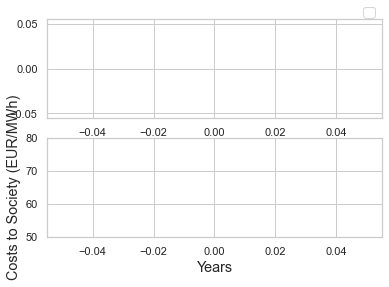

In [51]:
# axs1 = sns.lineplot(data=Coststosociety_data, palette="tab10", linewidth=2.5)
# plt.grid()
# sns.set_style("whitegrid")
# plt.grid()
# plt.xlabel('Years', fontsize='medium')
# plt.ylabel('Eur', fontsize='medium')
# plt.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
# axs1.set_title('Costs to Society')
# fig1 = axs1.get_figure()
# fig1.savefig(path_to_plots + '/' + 'Costs to Society.png', bbox_inches='tight', dpi=300)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.plot(Coststosociety_data)
#ax1 = sns.lineplot(data=LOL_data, palette="tab10", linewidth=2.5)
plt.ylabel('Costs to Society (EUR/MWh)', fontsize='large')
plt.ylim([50, 80])
ax1.legend(Coststosociety_data.columns.values, bbox_to_anchor=(1, 1.2), fontsize='large')
ax2.plot(Coststosociety_data)
#ax2 = sns.lineplot(data=LOL_data, palette="tab10", linewidth=2.5)
plt.xlabel('Years', fontsize='large')
fig.savefig(path_to_plots + '/' + 'Costs to Society.png', bbox_inches='tight', dpi=300)

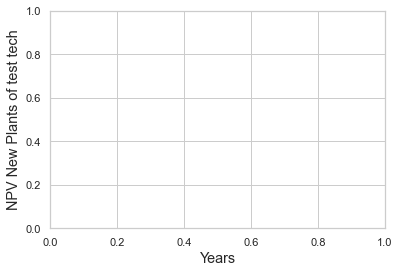

In [52]:
axs1 = sns.lineplot(data=NPVNewPlants_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('NPV New Plants of test tech', fontsize='large')
#plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs2.set_title('NPV new power plants')
fig1 = axs1.get_figure()
fig1.savefig(path_to_plots + '/' + 'NPVNewPlants.png', bbox_inches='tight', dpi=300)

In [53]:
Dismantled_capacity_data *= -1

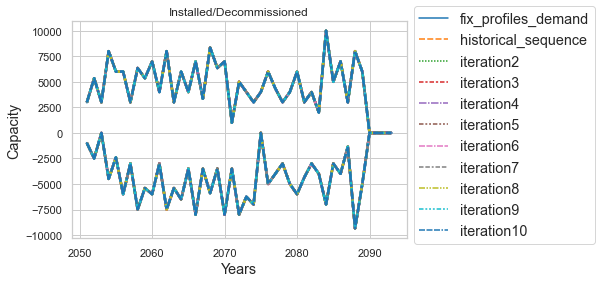

In [54]:
Dismantled_capacity_data.drop([2046, 2047,2048,2049,2050], inplace = True)
Invested_capacity_data.drop([2046, 2047,2048,2049,2050], inplace = True)
axs2 = sns.lineplot(data=Dismantled_capacity_data, palette="tab10", linewidth=2.5)
axs2 = sns.lineplot(data=Invested_capacity_data, palette="tab10", linewidth=2.5, legend = None) 
#sns.lineplot(data=Invested_capacity_data,palette="tab10", linewidth=2.5,    ax=axs2, legend = None)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Capacity', fontsize='large')
plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
axs2.set_title('Installed/Decommissioned')
fig2 = axs2.get_figure()
fig2.savefig(path_to_plots + '/' + 'Invested_Dismantled_ Capacity.png', bbox_inches='tight', dpi=300)

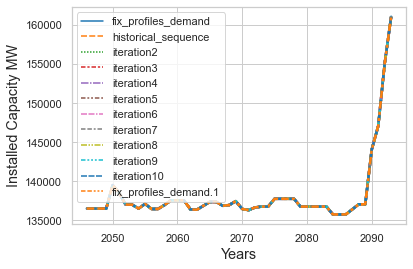

In [55]:
axs2 = sns.lineplot(data=InstalledCapacity_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Installed Capacity MW', fontsize='large')
#plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs2.set_title('Market-based Cost recovery')
fig2 = axs2.get_figure()
fig2.savefig(path_to_plots + '/' + 'InstalledCapacity.png', bbox_inches='tight', dpi=300)

In [76]:
CostRecovery_data.std()

fix_profiles_demand     3.537671
historical_sequence    10.773555
iteration2              7.957065
iteration3             12.666872
iteration4             10.963257
iteration5              7.240802
iteration6             10.401722
iteration7              8.115295
iteration8             11.151679
iteration9             10.978849
iteration10             8.333115
dtype: float64

In [80]:
CostRecovery_data.mean(axis=0)

fix_profiles_demand    107.958292
historical_sequence    111.770938
iteration2             111.836065
iteration3             112.524888
iteration4             111.410463
iteration5             110.878881
iteration6             111.632920
iteration7             110.834626
iteration8             113.906539
iteration9             111.573581
iteration10            111.849119
dtype: float64

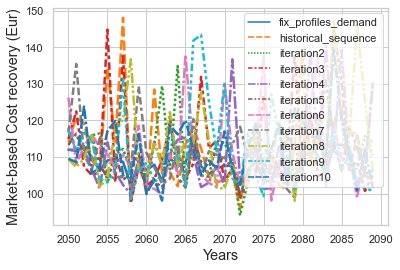

In [57]:
#CostRecovery_data.drop([2050], inplace=True)
axs3 = sns.lineplot(data=CostRecovery_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Market-based Cost recovery (Eur)', fontsize='large')
#plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs2.set_title('Market-based Cost recovery')
fig3 = axs3.get_figure()
fig3.savefig(path_to_plots + '/' + 'Cost_Recovery.png', bbox_inches='tight', dpi=300)

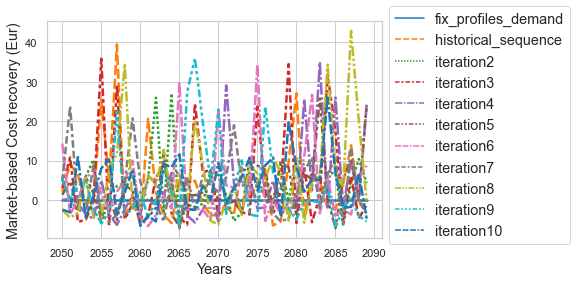

In [58]:
CostRecovery_data_substracted = CostRecovery_data.sub(CostRecovery_data['fix_profiles_demand'], axis=0)
axs3 = sns.lineplot(data=CostRecovery_data_substracted, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Market-based Cost recovery (Eur)', fontsize='large')
plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs2.set_title('Market-based Cost recovery')
fig3 = axs3.get_figure()
fig3.savefig(path_to_plots + '/' + 'Cost_Recovery_substracted.png', bbox_inches='tight', dpi=300)

In [81]:
CostRecovery_data_substracted.mean()

fix_profiles_demand    0.000000
historical_sequence    3.812645
iteration2             3.877773
iteration3             4.566596
iteration4             3.452171
iteration5             2.920589
iteration6             3.674628
iteration7             2.876334
iteration8             5.948247
iteration9             3.615289
iteration10            3.890827
dtype: float64

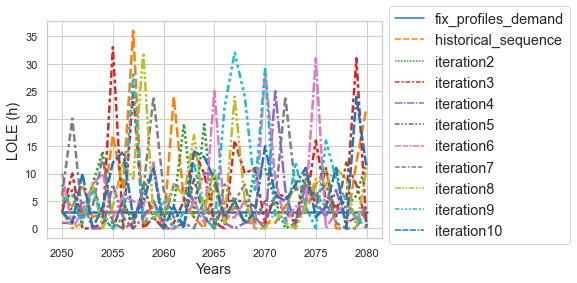

In [59]:
#LOL_data.drop([2050], inplace=True)
# fig, axes = plt.subplots(nrows=2, ncols=1)
# sns.set_style("whitegrid")
# sns.lineplot(data=LOL_data,palette="tab10", linewidth=2.5,  ax=axes[0], legend = None)
# plt.ylim([0, 25])
# plt.ylabel('Hours', fontsize='large')

# sns.lineplot(data=LOL_data,palette="tab10", linewidth=2.5,    ax=axes[1], legend = None)
# plt.ylim([0, 220])
# #axes[1].legend(LOL_data.columns.values, fontsize='medium',  bbox_to_anchor=(1, 1.1))
# plt.ylabel('Hours', fontsize='large')
# axes[0].set_title('LOLE')
# fig.savefig(path_to_plots + '/' + 'LOLE.png', bbox_inches='tight', dpi=300)
axs6 = sns.lineplot(data=LOL_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('LOLE (h)', fontsize='large')
plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs6.set_title('LOLE')
fig6 = axs6.get_figure()
fig6.savefig(path_to_plots + '/' + 'LOLEs.png', bbox_inches='tight', dpi=300)

In [85]:
LOL_data_substracted = LOL_data.sub(LOL_data["fix_profiles_demand"], axis=0)

In [87]:
LOL_data_substracted.mean()

fix_profiles_demand    0.000000
historical_sequence    3.580645
iteration2             2.967742
iteration3             4.129032
iteration4             1.129032
iteration5             1.193548
iteration6             3.193548
iteration7             2.903226
iteration8             3.612903
iteration9             4.774194
iteration10            3.774194
dtype: float64

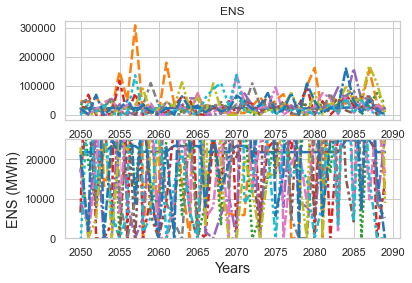

In [60]:
fig, axes= plt.subplots(nrows=2, ncols=1)
sns.lineplot(data=ENS_data, palette="tab10", linewidth=2.5, ax=axes[0], legend = None)
plt.ylabel('MWh', fontsize='medium')
plt.ylim([0, 25000])
sns.lineplot(data=ENS_data, palette="tab10", linewidth=2.5, ax=axes[1], legend = None)
plt.xlabel('Years', fontsize='large')
plt.ylabel('ENS (MWh)', fontsize='large')
#axes[1].legend(ENS_data.columns.values, fontsize='medium',  bbox_to_anchor=(1, 1.1))
axes[0].set_title('ENS')
fig.savefig(path_to_plots + '/' + 'Energy not supplied.png', bbox_inches='tight', dpi=300)

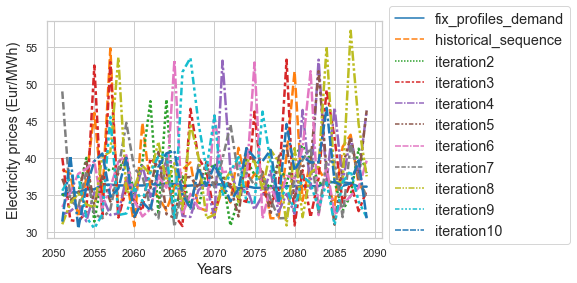

In [61]:
#CostRecovery_data.plot()
#ElectricityPrices_data.drop([2050], inplace=True)
axs6 = sns.lineplot(data=ElectricityPrices_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Electricity prices (Eur/MWh)', fontsize='large')
plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs6.set_title('Electricity prices')
fig6 = axs6.get_figure()
fig6.savefig(path_to_plots + '/' + 'Electricity prices.png', bbox_inches='tight', dpi=300)

In [89]:
ElectricityPrices_data.mean(axis=0)

fix_profiles_demand    36.239842
historical_sequence    37.501252
iteration2             37.362628
iteration3             37.523397
iteration4             37.165705
iteration5             37.544447
iteration6             37.548900
iteration7             36.931148
iteration8             38.597772
iteration9             37.406689
iteration10            37.577387
dtype: float64

In [88]:
ElectricityPrices_data.std()

fix_profiles_demand    0.357242
historical_sequence    5.220993
iteration2             3.736388
iteration3             6.289143
iteration4             5.472734
iteration5             4.117576
iteration6             5.371730
iteration7             4.119617
iteration8             6.019657
iteration9             5.444511
iteration10            3.619613
dtype: float64

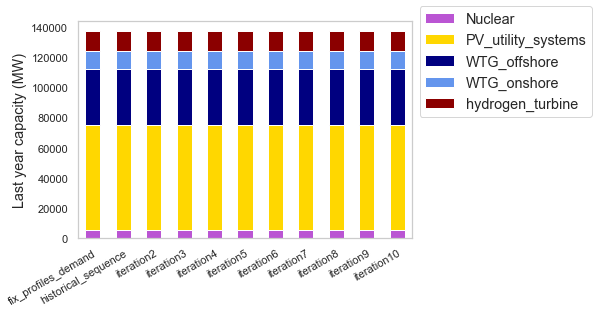

In [62]:
cpacities = Last_year_capacity_data.T
cpacities_nozeroes = cpacities[cpacities>0]
cpacities_nozeroes.dropna(how='all', axis =1, inplace=True)
colors = [technology_colors[tech] for tech in cpacities_nozeroes.columns.values]
axs9 = cpacities_nozeroes.plot(kind='bar', stacked=True, color=colors)
plt.grid()
sns.set_style("whitegrid")
axs9.set_xticklabels(cpacities_nozeroes.index.values, rotation = 30,  rotation_mode="anchor", ha="right")
plt.ylabel('Last year capacity (MW)', fontsize='large')
plt.legend(fontsize='large', loc='upper left', bbox_to_anchor=(1, 1.1))
fig9 = axs9.get_figure()
fig9.savefig(path_to_plots + '/' + 'Last year capacity.png', bbox_inches='tight', dpi=300)


C:\Users\isanchezjimene\AppData\Local\Temp\ipykernel_19280\4107581734.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(newcolumns, rotation = 30,  rotation_mode="anchor", ha="left")


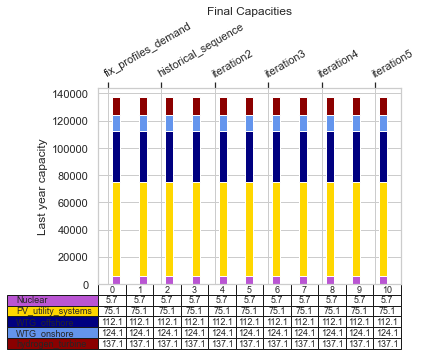

In [63]:
final_year_capacities = cpacities_nozeroes.T
data =final_year_capacities.values
columns = list(range(0, len(final_year_capacities.columns))) #final_year_capacities.columns
newcolumns = final_year_capacities.columns.insert(0, "new")
rows = final_year_capacities.index

n_rows = len(data)
bar_width = 0.3
index = np.arange(len(columns)) + bar_width

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
fig, axs = plt.subplots()
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
#colors = colors[::-1]
#cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      cellLoc ='center',
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.title('Final Capacities')
plt.ylabel("Last year capacity")

ax = plt.gca()
ax.xaxis.tick_top()
ax.set_xticklabels(newcolumns, rotation = 30,  rotation_mode="anchor", ha="left")
# plt.show()
# plt.savefig(path_to_plots + '/' + 'Last year capacity with numbers.png')
fig10 = plt.gcf()
fig10.savefig(path_to_plots + '/' + 'Last year capacity with numbers.png', bbox_inches='tight', dpi=300)

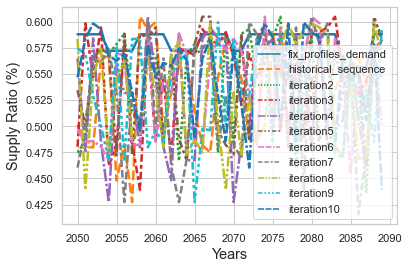

In [64]:
axs7 = sns.lineplot(data=SupplyRatio_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Supply Ratio (%)', fontsize='large')
#plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs7.set_title('Supply Ratio')
fig7 = axs7.get_figure()
fig7.savefig(path_to_plots + '/' + 'Supply Ratio.png', bbox_inches='tight', dpi=300)


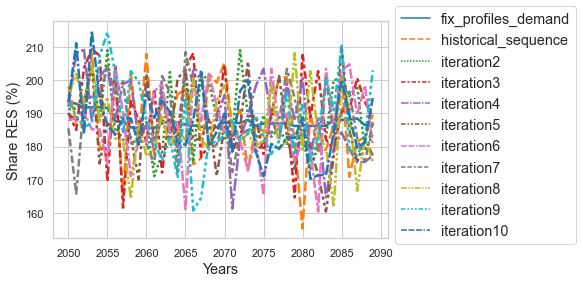

In [65]:
percentage_RES = ShareRES_data
axs8 = sns.lineplot(data=percentage_RES, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Share RES (%)', fontsize='large')
plt.legend(fontsize='large',   bbox_to_anchor=(1, 1.1))
#axs8.set_title('Share RES')
fig8 = axs8.get_figure()
fig8.savefig(path_to_plots + '/' + 'Share RES.png', bbox_inches='tight', dpi=300)


In [66]:
# sns.set_theme(style="whitegrid")
# sns.set(font_scale=1.2)
# sheet_name = "extendedNL"
# df = pd.read_excel("C:\\toolbox-amiris-emlab\\data\\Power_plants.xlsx",
#                    sheet_name=sheet_name)
# colors = [technology_colors[tech] for tech in df["Technology"].unique()]

# fig1 = sns.relplot(x="Age", y="Efficiency", hue="Technology", size="Capacity",
#                    sizes=(40, 400), alpha=.5, palette=colors,
#                    height=6, data=df)
# plt.xlabel("Age", fontsize="large")
# plt.ylabel("Efficiency", fontsize="large")
# fig1.savefig(path_to_plots + '/' + 'Initial_power_plants' +sheet_name + '.png', bbox_inches='tight', dpi=300)
